In [20]:
shape, scale = 2, 0.5

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import os, time, gc

In [41]:
s = np.random.gamma(shape, scale, (9,150))

In [42]:
s

array([[0.3126353 , 0.16543008, 1.3030727 , ..., 1.50426122, 0.94610628,
        0.27196443],
       [1.64382441, 1.05460361, 1.48176375, ..., 1.64698355, 0.57983452,
        0.62066822],
       [0.43329185, 1.96874924, 0.6515472 , ..., 0.22047672, 1.70023   ,
        1.13973832],
       ...,
       [0.05219028, 0.35616585, 0.19328465, ..., 1.50052832, 0.93543791,
        0.7552338 ],
       [0.55290538, 1.19653567, 0.9138305 , ..., 1.54889849, 1.35209328,
        0.6355069 ],
       [0.99858153, 0.21515345, 0.93254853, ..., 3.59986726, 1.41624463,
        0.56818841]])

/home/hq/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.


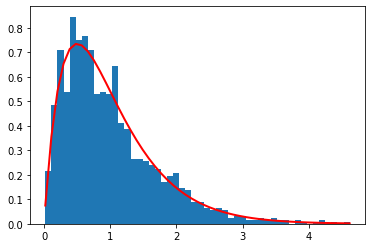

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.special as sps
count, bins, ignored = plt.hist(s, 50, normed=True)
y = bins**(shape-1)*(np.exp(-bins/scale) /
                     (sps.gamma(shape)*scale**shape))
plt.plot(bins, y, linewidth=2, color='r')
plt.show()

In [50]:
s.mean()

0.9783139546972591

In [47]:
s.shape

(9, 150)

In [31]:
import scikits.bootstrap as boot


In [82]:
%time cis = boot.ci(s, np.mean, alpha=0.05, n_samples=30000, method='pi', output='lowhigh', multi=False)
cis

CPU times: user 385 ms, sys: 57 µs, total: 385 ms
Wall time: 382 ms


array([0.94674917, 1.01078657])

In [54]:
np.mean([cis[0],cis[1]])

0.9789959029313714

In [86]:
%time cis = boot.ci(s, np.mean, alpha=0.05, n_samples=30000, method='bca', output='lowhigh', multi=False)
cis

CPU times: user 375 ms, sys: 0 ns, total: 375 ms
Wall time: 373 ms


array([0.94824894, 1.01231544])

In [87]:
0.94824894+0.0163*1.96

0.98019694

In [52]:
np.mean([cis[0],cis[1]])

0.9805158155412286

In [57]:
from mlxtend.evaluate import bootstrap

In [76]:
%time original, std_err, ci_bounds = bootstrap(s, num_rounds=30000, func=np.mean, ci=0.95, seed=42)
print('Mean: %.10f, SE: +/- %.4f, CI95: [%.4f, %.4f]' % (original, 
                                                             std_err, 
                                                             ci_bounds[0],
                                                             ci_bounds[1]))

CPU times: user 631 ms, sys: 19.9 ms, total: 650 ms
Wall time: 634 ms
Mean: 0.9783139547, SE: +/- 0.0163, CI95: [0.9473, 1.0108]


In [74]:
0.9473+0.0163*1.96

0.979248

In [73]:
1.0108-0.01631*1.96

0.9788323999999999